# Overfitting and Underfitting 

**Overfitting**: Overfitting is a phenomenon that occurs when a machine learning model becomes too complex and starts to memorize the training data instead of learning the underlying patterns. In other words, an overfit model fits the training data too closely, to the extent that it captures noise, random fluctuations, and specific characteristics of the training set that may not be present in the broader population or in future unseen data.

**Underfitting**: Underfitting is the opposite of overfitting and occurs when a machine learning model is too simple to capture the underlying patterns in the data. An underfit model fails to adequately learn from the training data and consequently performs poorly not only on the training data but also on new, unseen data.

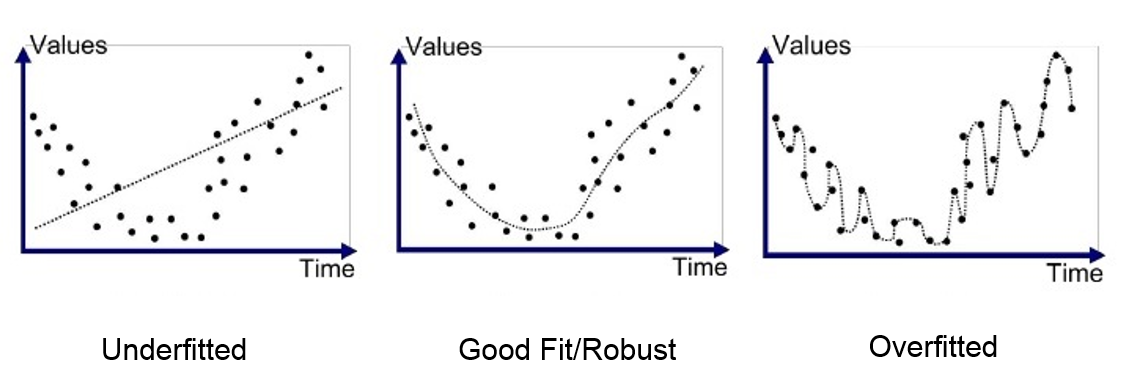

In machine learning, **variance** and **bias** are two important concepts that describe the behavior of a model during training and testing. They are related to the model's ability to generalize from training data to unseen data. Here's a breakdown of the difference between variance and bias:
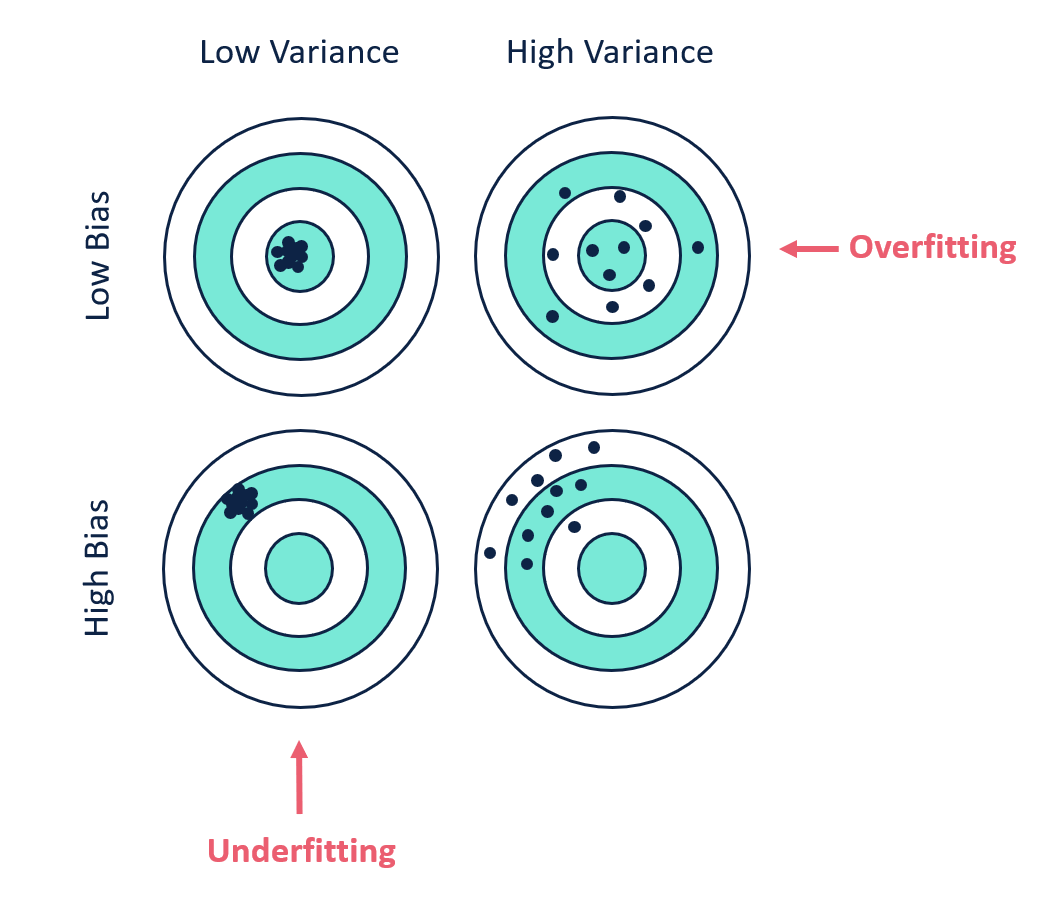

**Bias:** Bias refers to the error introduced by approximating a real-world problem with a simplified model. A high bias model makes strong assumptions about the data and oversimplifies the underlying relationships. Such a model may consistently miss relevant patterns and exhibit systematic errors. In other words, bias measures how far off the predictions are from the true values on average.

**Variance:** Variance, on the other hand, measures the variability of model predictions for different training sets. A high variance model is sensitive to the training data and tends to overfit. It captures noise and random fluctuations in the training data, resulting in poor performance when applied to new, unseen data. In simple terms, variance represents how much the predictions of the model vary with changes in the training data.
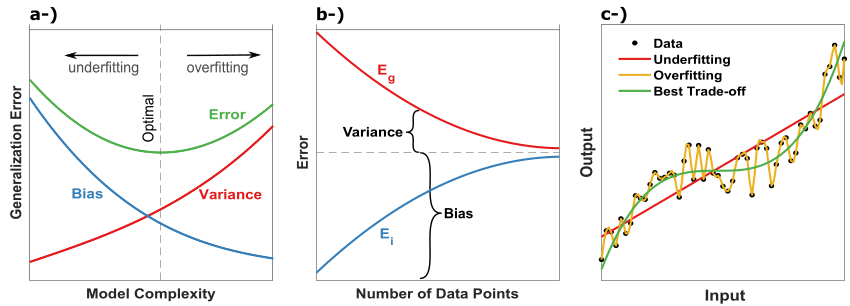

Here's how these concepts relate to training and testing:

**Training:** During training, a machine learning algorithm learns from the training data and adjusts its internal parameters to minimize the error. If the algorithm has high bias, it may underfit the training data and fail to capture important patterns. On the other hand, if it has high variance, it may overfit the training data, memorizing noise and exhibiting poor generalization.

**Testing:** After training, the model's performance is evaluated on a separate testing dataset. If the model has high bias, it will perform poorly on the test set due to its oversimplified assumptions. If it has high variance, it may also perform poorly because it cannot generalize well to unseen data.
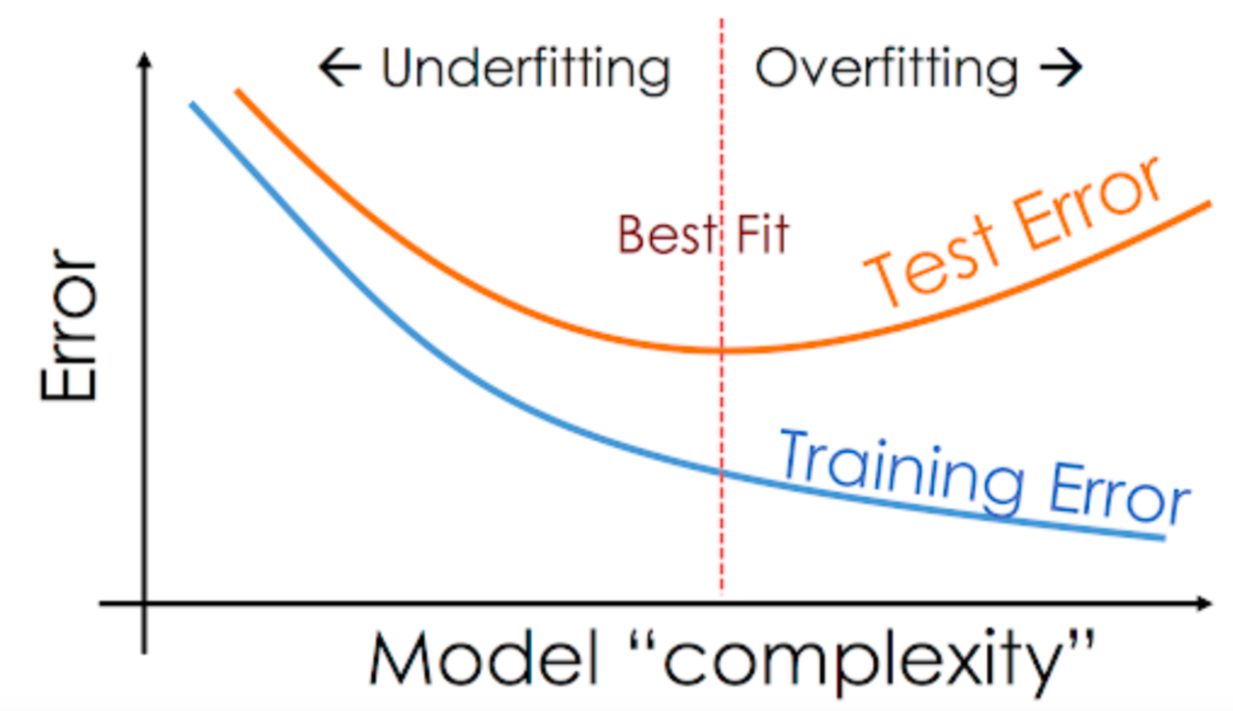

To achieve good generalization, it is important to strike a balance between bias and variance, known as the bias-variance trade-off. This can be done through techniques such as regularization, feature selection, or using more complex models. The goal is to find the right level of complexity that minimizes both bias and variance, leading to a model that generalizes well to new, unseen data.

In [22]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [23]:
df = pd.read_csv('Datasets/Hitters.csv')
df.shape

(322, 20)

In [24]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [26]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [27]:
#Categorical Variables 
print('The league types are:', df['League'].unique())
print('The divison types are:', df['Division'].unique())
print('The new league options are:', df['NewLeague'].unique())

The league types are: ['A' 'N']
The divison types are: ['E' 'W']
The new league options are: ['A' 'N']


In [28]:
df_hitters_num = pd.get_dummies(df, columns = ['League', 'Division', 'NewLeague'], drop_first=True)
df_hitters_num

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0,1,0,1
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0,0,0,0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0,0,1,0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0,0,0,0


In [29]:
df_hitters_num.isnull().sum()

AtBat           0
Hits            0
HmRun           0
Runs            0
RBI             0
Walks           0
Years           0
CAtBat          0
CHits           0
CHmRun          0
CRuns           0
CRBI            0
CWalks          0
PutOuts         0
Assists         0
Errors          0
Salary         59
League_N        0
Division_W      0
NewLeague_N     0
dtype: int64

In [30]:
df_hitters_num_nonull = df_hitters_num.dropna()
df_hitters_num_nonull.isnull().sum()

AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
PutOuts        0
Assists        0
Errors         0
Salary         0
League_N       0
Division_W     0
NewLeague_N    0
dtype: int64

In [31]:
df_hitters_num_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        263 non-null    int64  
 1   Hits         263 non-null    int64  
 2   HmRun        263 non-null    int64  
 3   Runs         263 non-null    int64  
 4   RBI          263 non-null    int64  
 5   Walks        263 non-null    int64  
 6   Years        263 non-null    int64  
 7   CAtBat       263 non-null    int64  
 8   CHits        263 non-null    int64  
 9   CHmRun       263 non-null    int64  
 10  CRuns        263 non-null    int64  
 11  CRBI         263 non-null    int64  
 12  CWalks       263 non-null    int64  
 13  PutOuts      263 non-null    int64  
 14  Assists      263 non-null    int64  
 15  Errors       263 non-null    int64  
 16  Salary       263 non-null    float64
 17  League_N     263 non-null    uint8  
 18  Division_W   263 non-null    uint8  
 19  NewLeagu

<AxesSubplot:>

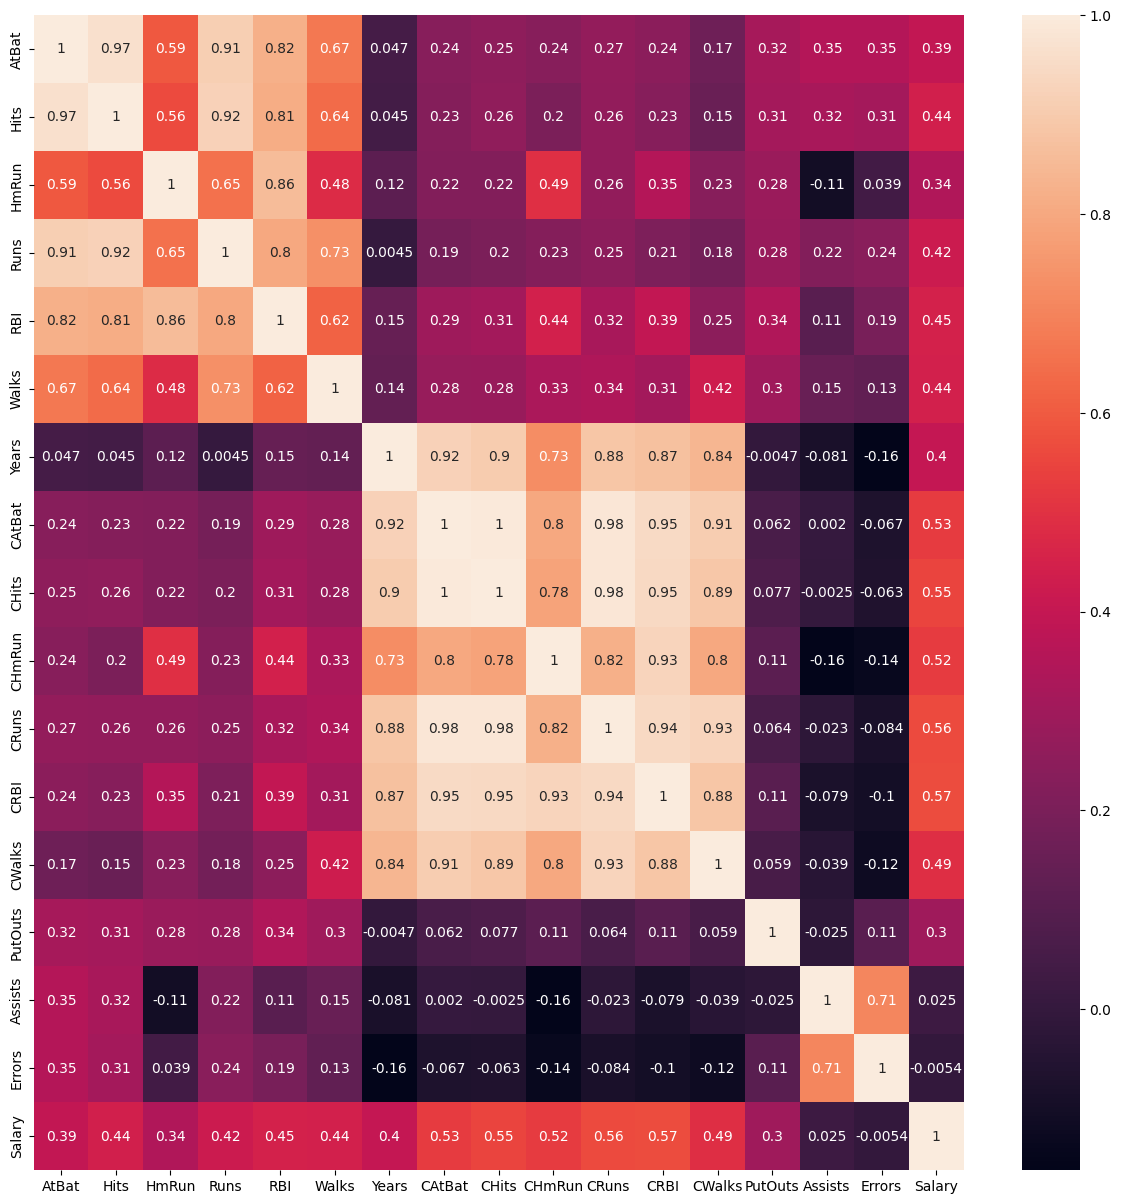

In [32]:
#check the correlation between the dependent and independent variables 
correlation = df_hitters_num_nonull.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

In [33]:
#check the correlation between the dependent and independent variables 
correlation['Salary'].sort_values(ascending=True)

Division_W    -0.192514
League_N      -0.014282
Errors        -0.005401
NewLeague_N   -0.002834
Assists        0.025436
PutOuts        0.300480
HmRun          0.343028
AtBat          0.394771
Years          0.400657
Runs           0.419859
Hits           0.438675
Walks          0.443867
RBI            0.449457
CWalks         0.489822
CHmRun         0.524931
CAtBat         0.526135
CHits          0.548910
CRuns          0.562678
CRBI           0.566966
Salary         1.000000
Name: Salary, dtype: float64

In [44]:
# Drop the unnecessary columns
df = df_hitters_num_nonull.drop(['Division_W', 'League_N', 'Errors', 'NewLeague_N', 'Assists', 'PutOuts', 'HmRun', 'AtBat', 'Years'], axis=1)
df.head()

,Hits,Runs,RBI,Walks,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,Salary
1,81,24,38,39,3449,835,69,321,414,375,475.0
2,130,66,72,76,1624,457,63,224,266,263,480.0
3,141,65,78,37,5628,1575,225,828,838,354,500.0
4,87,39,42,30,396,101,12,48,46,33,91.5
5,169,74,51,35,4408,1133,19,501,336,194,750.0


In [52]:
X = df.drop('Salary', axis = 1)
y = df['Salary']

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=365)

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression 

In [55]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

print('Linear Regression coefficients are: ', lin_model.coef_)
print('Linear Regression y-intercept is: ', lin_model.intercept_)

Linear Regression coefficients are:  [   55.82448947   -50.79588187    39.86387235    81.96254487
 -1318.42084817  1237.5647233     24.32292188   264.98928808
    47.98708848   -34.07686114]
Linear Regression y-intercept is:  532.296117647059


In [56]:
lin_y_pred = lin_model.predict(X_test)
lin_pred = pd.DataFrame({'Predicted': lin_y_pred, 'Actual': y_test})
lin_pred.head()

,Predicted,Actual
14,305.941577,240.0
181,501.446958,737.5
177,748.892072,1300.0
124,827.494512,737.5
277,455.824955,475.0


In [57]:
from sklearn.metrics import mean_squared_error

print('Linear Regression Model RMSE is: ', math.sqrt(mean_squared_error(y_test, lin_y_pred)))
print('Linear Regression Model Training score: ', lin_model.score(X_train, y_train))
print('Linear Regression Model Training score: ', lin_model.score(X_test, y_test))

Linear Regression Model RMSE is:  293.2689001774248
Linear Regression Model Training score:  0.4658832219969846
Linear Regression Model Training score:  0.42638246041694094


## Ridge Regression 

In [58]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


Ridge Model............................................

The train score for ridge model is 0.4147799271920687
The test score for ridge model is 0.5426913450514561
